# Анализ данных компаний и поиск проблем не окупаемости.

## Описание - с течением времени деньги в рекламу постоянно вкладывались и количество их росло, и через несколько месяцев компания несмотря на все усилия терпить убытки.


## Цель работы - иследовать данные и разобраться в причинах, почему компания терпит убитки

# Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

###  Запрос информации по данным из visits

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
display(visits.head(5))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Преобразуем данные о времени данных из visits в графе Session Start и Session End

In [5]:
visits['Session Start']=pd.to_datetime(visits['Session Start'])
visits['Session End']=pd.to_datetime(visits['Session End'])

Поиск пропусков в visits

In [6]:
display(visits.isna().sum())

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Поиск аномалий visits

In [7]:
display(visits['Region'].value_counts())
display(visits['Device'].value_counts())
display(visits['Channel'].value_counts())

United States    207327
UK                36419
France            35396
Germany           30759
Name: Region, dtype: int64

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: Device, dtype: int64

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: Channel, dtype: int64

In [8]:
display(visits.duplicated().sum())

0

Исправление написание 

In [9]:
visits['Region'] = visits['Region'].str.lower()
visits['Device'] = visits['Device'].str.lower()
visits['Channel'] = visits['Channel'].str.lower()
display(visits.head(5))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [10]:
visits = visits.rename(
    columns = {'Region' : 'region', 'Device' : 'device', 'Channel':'channel', 'User Id' : 'user_id',
                                  'Session Start':'session_start','Session End':'session_end'}
                      )
display(visits['channel'].value_counts())

organic               107760
tiptop                 54794
faceboom               49022
wahoonetbanner         20465
leapbob                17013
opplecreativemedia     16794
rocketsuperads         12724
yrabbit                 9053
mediatornado            8878
adnonsense              6891
lambdamediaads          6507
Name: channel, dtype: int64

In [11]:
visits['region'] = visits['region'].replace('united states','united_states')
visits['channel'] = visits['channel'].replace('tiptop','tip_top')
visits['channel'] = visits['channel'].replace('faceboom','face_boom')
visits['channel'] = visits['channel'].replace('wahoonetbanner','waho_onet_banner')
visits['channel'] = visits['channel'].replace('leapbob','leap_bob')
visits['channel'] = visits['channel'].replace('opplecreativemedia','opple_creative_media')
visits['channel'] = visits['channel'].replace('rocketsuperads','rocket_super_ads')
visits['channel'] = visits['channel'].replace('mediatornado','media_tornado')
visits['channel'] = visits['channel'].replace('adnonsense','ad_non_sense')
visits['channel'] = visits['channel'].replace('lambdamediaads','lambda_media_ads')


###  Запрос информации по данным из orders

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
display(orders.head(5))

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Преобразуем данные о времени данных из orders в графе Event Dt

In [14]:
orders['Event Dt']= pd.to_datetime(orders['Event Dt'])

Поиск пропусков в orders

In [15]:
display(orders.isna().sum())

User Id     0
Event Dt    0
Revenue     0
dtype: int64

Поиск дубликатов

In [16]:
display(orders.duplicated().sum())

0

Поиск аномалий и исправление написания

In [17]:
orders = orders.rename(columns = {'User Id' : 'user_id', 'Event Dt' : 'event_dt', 'Revenue':'revenue'})
display(orders.value_counts())

user_id       event_dt             revenue
599326        2019-05-07 20:59:09  4.99       1
660787742648  2019-10-16 22:55:01  4.99       1
660764823805  2019-07-17 09:03:36  4.99       1
              2019-08-05 21:01:38  4.99       1
              2019-08-10 23:57:13  4.99       1
                                             ..
338276441244  2019-10-16 13:08:54  4.99       1
338343388023  2019-05-17 12:39:43  4.99       1
              2019-05-19 17:44:07  4.99       1
              2019-05-26 15:01:30  4.99       1
999895427370  2019-09-19 23:33:23  4.99       1
Length: 40212, dtype: int64

### Запрос информации по данным из costs

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [19]:
display(costs.head())

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


Преобразуем данные о времени данных из costs в графе dt

In [20]:
costs['dt'] = pd.to_datetime(costs['dt'])

Поиск пропусков в costs

In [21]:
display(costs.isna().sum())

dt         0
Channel    0
costs      0
dtype: int64

Поиск аномалий costs и исправление написания слов( приведу к змеиному шрифту)

In [22]:
display(costs['Channel'].value_counts())

AdNonSense            180
TipTop                180
RocketSuperAds        180
FaceBoom              180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
YRabbit               180
LeapBob               180
MediaTornado          180
Name: Channel, dtype: int64

In [ ]:
costs['Channel'] = costs['Channel'].str.lower()
display(costs['Channel'].value_counts())

In [24]:
costs = costs.rename(columns = {'Channel' : 'channel'})
costs['channel'] = costs['channel'].replace('mediatornado','media_tornado')
costs['channel'] = costs['channel'].replace('opplecreativemedia','opple_creative_media')
costs['channel'] = costs['channel'].replace('adnonsense','ad_non_sense')
costs['channel'] = costs['channel'].replace('tiptop','tip_top')
costs['channel'] = costs['channel'].replace('wahoonetbanner','waho_onet_banner')
costs['channel'] = costs['channel'].replace('lambdamediaads','lambda_media_ads')
costs['channel'] = costs['channel'].replace('rocketsuperads','rocket_super_ads')
costs['channel'] = costs['channel'].replace('leapbob','leap_bob')
costs['channel'] = costs['channel'].replace('faceboom','face_boom')
display(costs['channel'].value_counts())

waho_onet_banner        180
ad_non_sense            180
rocket_super_ads        180
yrabbit                 180
media_tornado           180
face_boom               180
tip_top                 180
lambda_media_ads        180
opple_creative_media    180
leap_bob                180
Name: channel, dtype: int64

Поиск дубликатов

In [25]:
display(costs.duplicated().sum())

0

Вывод  имеющиеся данные из табиц costs, orders и visits подготовил для дальнейшего анализа. Первое что сделал с каждой таблицей это получил общую информацию по таблицах, в столбцах со временем данные имели тип object  - заменил на временной для удобствра дальнейшего использования, поиск дубликатов ничего не показал  повторов нигде нет, как и пропусков, шрифт привел к "змеиному" в названиях столбцов и везде где необходимо.

## Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

### Функция для создания пользовательских профилей

In [26]:
def get_profiles(visits, orders,  costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
             )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt','channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [27]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

### Функция для расчёта удержания

In [28]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### функция для расчёта конверсии

In [29]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта LTV и ROI

In [30]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### функция для сглаживания фрейма

In [31]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### функция для визуализации удержания

In [32]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

### функция для визуализации конверсии

In [33]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


### функция для визуализации LTV и ROI

In [34]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Вывод - из пройденной программы взял все необходимые функции для проведения анализза.

## Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Построение профилей пользователей

In [35]:
profiles = get_profiles(visits, orders, costs)
profiles['dt']= pd.to_datetime(profiles['dt'])
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,face_boom,mac,united_states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,face_boom,iphone,united_states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,ad_non_sense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united_states,2019-10-02,2019-10-01,False,0.230769


In [36]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 10.4+ MB


#### Определите минимальную и максимальную даты привлечения пользователей.

In [37]:
min_data = profiles['first_ts'].min()
print(f'Первая дата регистрации привлеченного пользователя - {min_data}')

Первая дата регистрации привлеченного пользователя - 2019-05-01 00:00:41


In [38]:
max_data = profiles['first_ts'].max()
print(f'Крайняя дата регистрации привлеченного пользователя - {max_data}')

Крайняя дата регистрации привлеченного пользователя - 2019-10-27 23:59:04


#### Из каких стран приходят посетители?

united_states    100002
uk                17575
france            17450
germany           14981
Name: region, dtype: int64

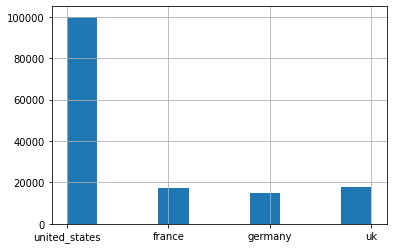

In [39]:
profiles['region'].hist(bins = 10)
profiles['region'].value_counts()


3.1.2 1е место среди всех пользователей занимает Америка с 100002 пользователями, следом идет Великобритания с 17575 пользвателями, дальше Франция и Германия - 17450 и 14981 человек. 

#### Какие страны дают больше всего платящих пользователей?

united_states    6902
uk                700
france            663
germany           616
Name: region, dtype: int64

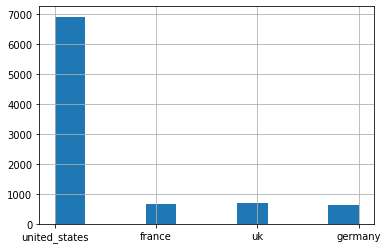

In [40]:
profiles1 = profiles.query('payer == True')
profiles1['region'].hist()
profiles1['region'].value_counts()

3.1.2 По платящим пользователям картнина такая же - 1е место среди всех пользователей занимает Америка с 6902 пользователями, следом идет Великобритания с 700 пользвателями, дальше Франция и Германия - 663 и 616 человек. 

#### долю платящих из каждой страны

In [41]:

payer = pd.pivot_table(profiles1, index = 'region', values='user_id', aggfunc = 'count')

payer['chogort'] = profiles['region'].value_counts()
payer['%_region'] = payer['user_id']/payer['chogort']
payer

,user_id,chogort,%_region
region,,,
france,663,17450,0.037994
germany,616,14981,0.041119
uk,700,17575,0.039829
united_states,6902,100002,0.069019


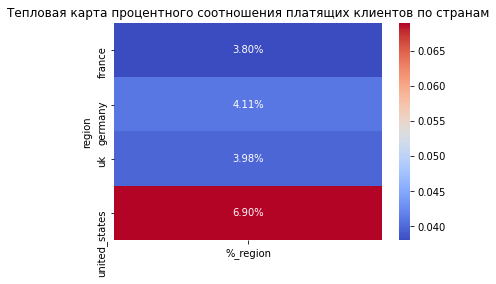

In [42]:
sns.heatmap(payer.drop(columns=['user_id','chogort']), annot=True, fmt='.2%', cmap= 'coolwarm')
plt.title('Тепловая карта процентного соотношения платящих клиентов по странам')

plt.show()

Вывод - из платящих пользователей доляАмерика занимает 6.9% от общего числа пользователей, Великобитания - 3.9% и Франция и Германия 3.8%  и 4.1%. 

#### Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?

iphone     54479
android    35032
pc         30455
mac        30042
Name: device, dtype: int64

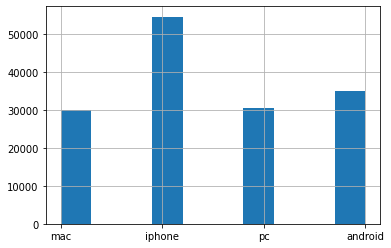

In [43]:
devices = profiles['device']
devices.hist()
devices.value_counts()

iphone     3382
android    2050
mac        1912
pc         1537
Name: device, dtype: int64

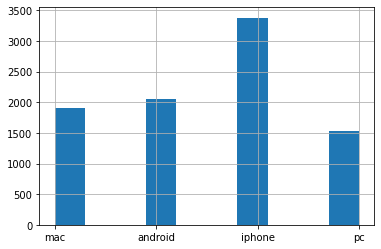

In [44]:
device_payer = profiles1['device']
device_payer.hist()
device_payer.value_counts()

Вывод - при разбивке пользователей по их устройствам получил что в основном в приложение заходя с Ipone 54479 юзера, для платящих пользователей - 3382 юзера, на Android - 35032 и платящие 2050 пользователя, и с pc и mac  30455 и  30042 для всех пользователей и для платящих  1537  1912 юзера.          

#### долю платящих для каждого устройства

In [45]:

payer1 = pd.pivot_table(profiles1, index = 'device', values='user_id', aggfunc = 'count')
payer1['chogort'] = profiles['device'].value_counts()
payer1['%_device'] = payer1['user_id']/payer1['chogort']
payer1



,user_id,chogort,%_device
device,,,
android,2050,35032,0.058518
iphone,3382,54479,0.062079
mac,1912,30042,0.063644
pc,1537,30455,0.050468


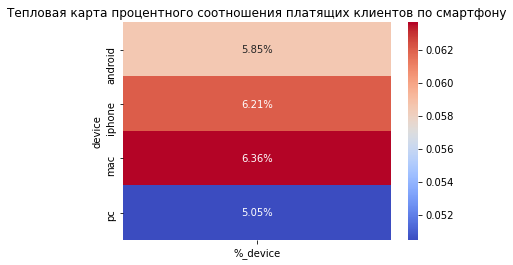

In [46]:
sns.heatmap(payer1.drop(columns=['user_id','chogort']), annot=True, fmt='.2%', cmap= 'coolwarm')
plt.title('Тепловая карта процентного соотношения платящих клиентов по смартфону')

plt.show()

Вывод - если смотреть в процентном соотношении  то iphone состовляет 6.2%, android - 5.85%, mac - 6.36% и pc - 5%.

#### По каким рекламным каналам шло привлечение пользователей? 

organic                 56439
face_boom               29144
tip_top                 19561
opple_creative_media     8605
waho_onet_banner         8553
leap_bob                 8553
rocket_super_ads         4448
media_tornado            4364
yrabbit                  4312
ad_non_sense             3880
lambda_media_ads         2149
Name: channel, dtype: int64

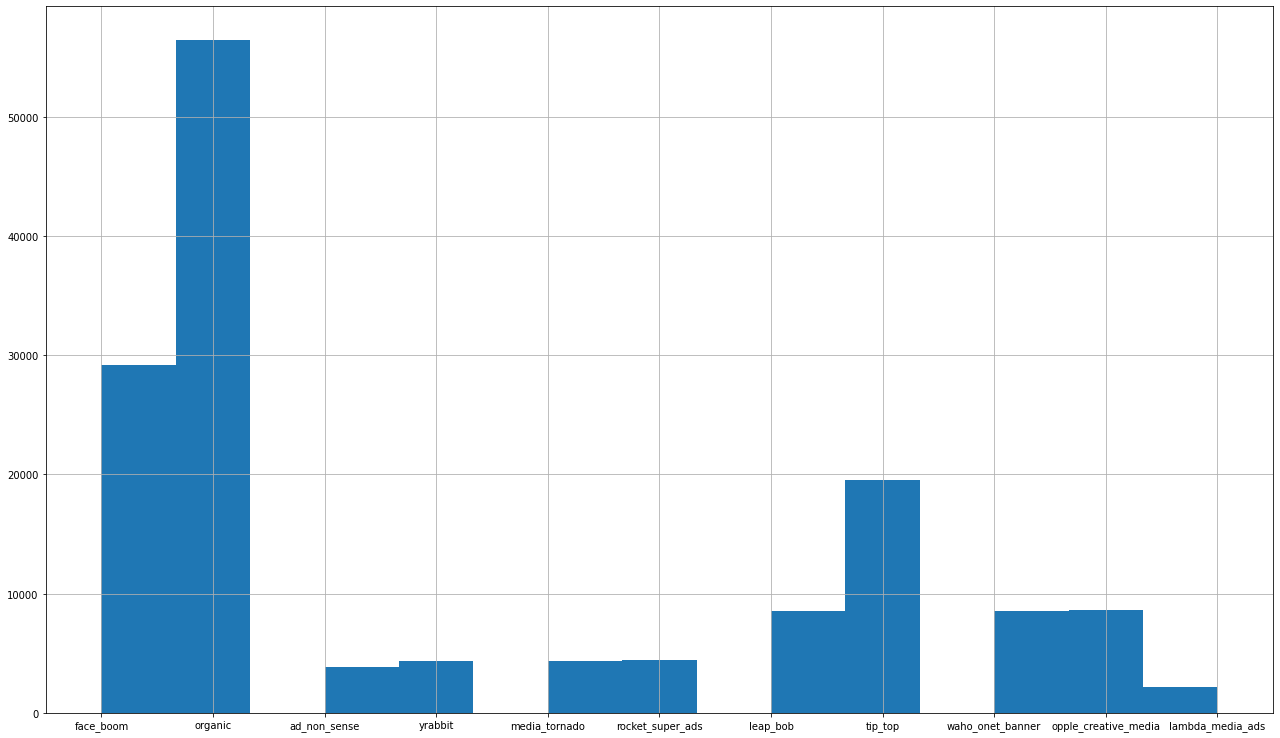

In [47]:
profiles['channel'].hist(bins = 15,grid=True, figsize=(22,13))
plt.show()
profiles['channel'].value_counts()

#### Какие каналы приносят больше всего платящих пользователей?

face_boom               3557
tip_top                 1878
organic                 1160
waho_onet_banner         453
ad_non_sense             440
rocket_super_ads         352
leap_bob                 262
opple_creative_media     233
lambda_media_ads         225
yrabbit                  165
media_tornado            156
Name: channel, dtype: int64

<AxesSubplot:>

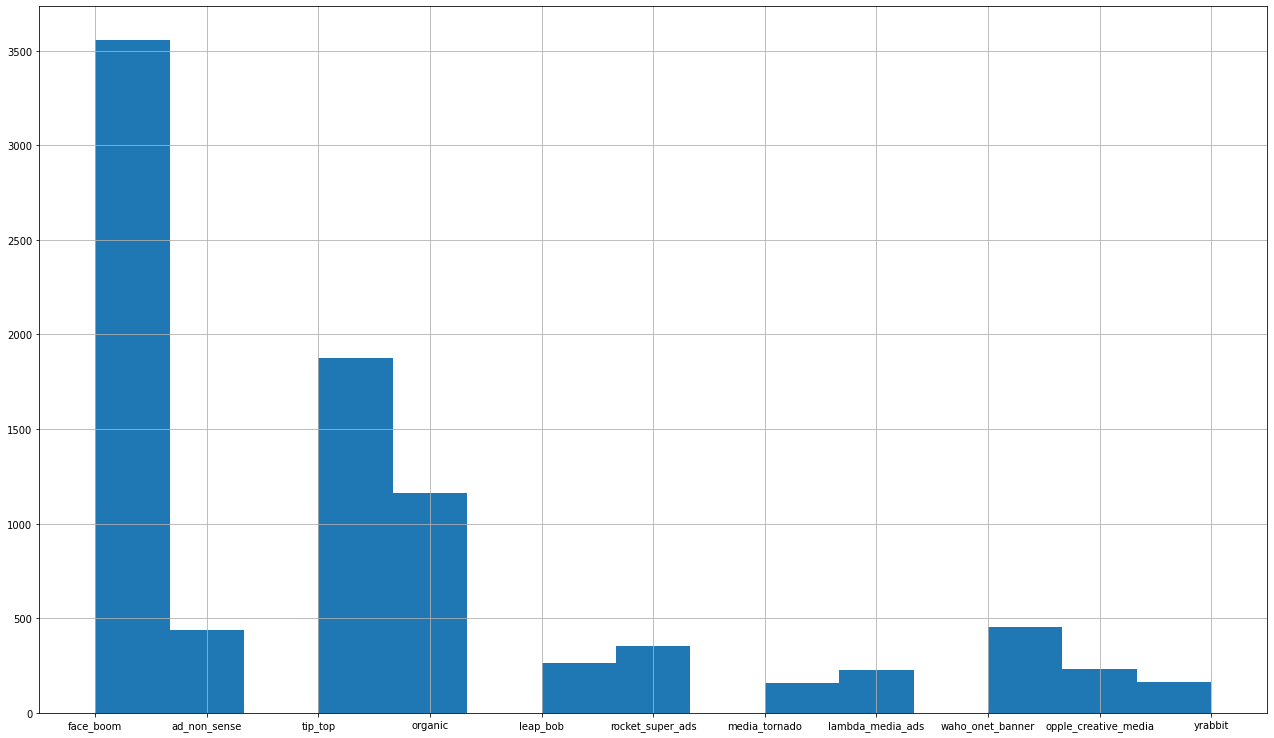

In [48]:
display(profiles1['channel'].value_counts())
profiles1['channel'].hist(bins = 15,grid=True, figsize=(22,13))
plt.show()


#### долю платящих для каждого канала привлечения

In [49]:

pc = pd.pivot_table(profiles1, index = 'channel', values='user_id', aggfunc = 'count')
pc['chogort'] = profiles['channel'].value_counts()
pc['%_device'] = pc['user_id']/pc['chogort']
display(pc)


,user_id,chogort,%_device
channel,,,
ad_non_sense,440,3880,0.113402
face_boom,3557,29144,0.122049
lambda_media_ads,225,2149,0.104700
leap_bob,262,8553,0.030633
media_tornado,156,4364,0.035747
opple_creative_media,233,8605,0.027077
organic,1160,56439,0.020553
rocket_super_ads,352,4448,0.079137
tip_top,1878,19561,0.096007


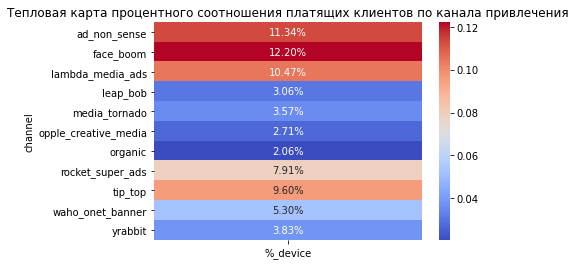

In [50]:
sns.heatmap(pc.drop(columns = ['user_id','chogort']), annot=True, fmt='.2%', cmap= 'coolwarm')
plt.title('Тепловая карта процентного соотношения платящих клиентов по канала привлечения')

plt.show()

Вывод - по каналам привлечения пользователей картина следующая, начнем с общего количества пользователей - organic - 56439,face_boom - 29144 ,tip_top -19561,opple_creative_media-8605 и waho_onet_banner-8553 пользователя/ для платящих клиентов картина немного иная - face_boom-3557,tip_top-1878,organic-1160,waho_onet_banner-453,ad_non_sense-440/ 
По процентному соотношению лидирует face_boom - 12.2%, ad_non_sense - 11.34%, lambda_media_ads - 10.47%.

## Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Сколько денег потратили? Всего / на каждый источник / по времени

В условии задания сказано что считать что сейчас на календаре 1 ноября 2019 года и это и назначим для observation_date, в качестве горизонта анализа возьмем 14 дней.

In [51]:
observation_date=datetime(2019,11, 1).date()
horizon_days = 14

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

Исключаем все органические каналы.

In [53]:
profiles= profiles.query('channel!="organic"')
profiles1 = profiles.query('channel!="organic"')
costs = costs.query('channel!="organic"')

#### Все пользователи

Чтобы посчитать сколько всего было потрачено денег на привлечение пользователей мне нужно посчитать и построить график CAC.

,acquisition_cost
dt,
2019-05-01,0.781590
2019-05-02,0.714690
2019-05-03,0.760318
2019-05-04,0.737418
2019-05-05,0.730377
...,...
2019-10-23,1.195554
2019-10-24,1.231369
2019-10-25,1.259270


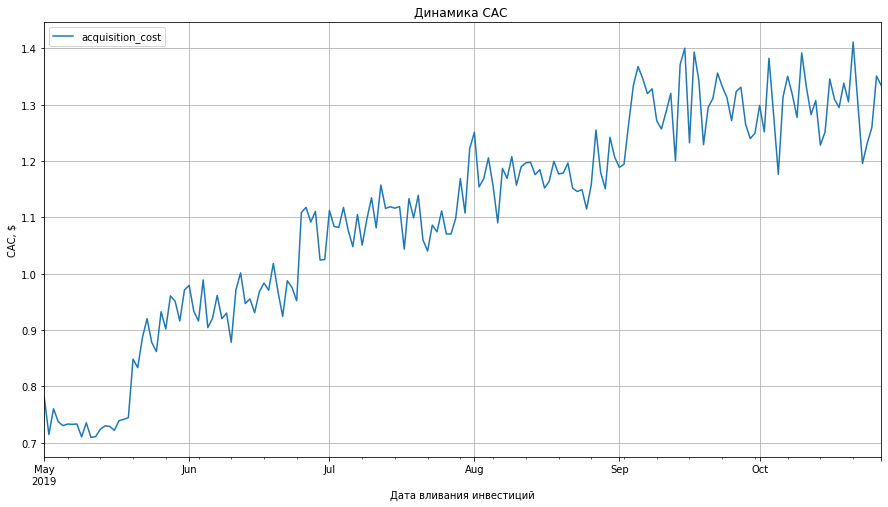

In [54]:
payer_alles = profiles.pivot_table(
    index='dt',  values='acquisition_cost', aggfunc='mean'
)
display(payer_alles)
payer_alles.plot(grid=True, figsize=(15, 8))
plt.ylabel('CAC, $')
plt.xlabel('Дата вливания инвестиций')
plt.title('Динамика САС ')
plt.show()

In [55]:
payer_alles_sum = sum(payer_alles['acquisition_cost'])
display(f'Общая сумма траты на маркетинг составила - {payer_alles_sum} y.e.')

'Общая сумма траты на маркетинг составила - 198.85976572674787 y.e.'

По графику видно что с мая 2019 года до ноября затраты на маркетинг примерно симетрично растут с небольшими скачками, с небольшой задержкой в мае после середины месяца траты на рекламу стали расти.

Общие затраты на мерктинг с разбивкой по каналом за все время

In [57]:
costs_payer_channel = costs.groupby('channel')['costs'].sum()
costs_payer_channel
costs_payer_channel=costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(by='costs')
sum_channel=costs_payer_channel['costs'].sum()
costs_payer_channel['%summ']=costs_payer_channel['costs']/sum_channel
costs_payer_channel


,costs,%summ
channel,,
yrabbit,944.22,0.008950
media_tornado,954.48,0.009047
lambda_media_ads,1557.60,0.014764
leap_bob,1797.60,0.017039
rocket_super_ads,1833.00,0.017375
opple_creative_media,2151.25,0.020392
ad_non_sense,3911.25,0.037074
waho_onet_banner,5151.00,0.048826
face_boom,32445.60,0.307549


<AxesSubplot:ylabel='channel'>

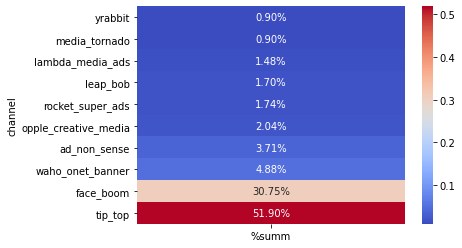

In [58]:
sns.heatmap(costs_payer_channel.drop(columns=['costs']),annot=True, fmt='.2%', cmap= 'coolwarm')
plt.show()


Общие затраты на маркетинг 

In [59]:
costs_payer = costs['costs'].sum()
display(f'Общие затраты на маркетинг за анализируемый период составили - {costs_payer} у.е.')

'Общие затраты на маркетинг за анализируемый период составили - 105497.30000000002 у.е.'

Графическое изменение трат на маркетинг

Общие затраты

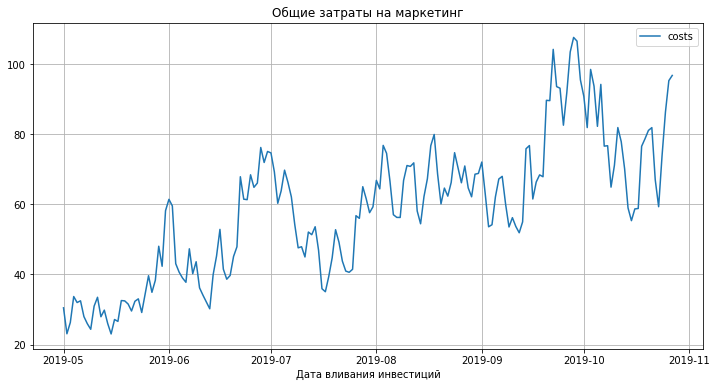

In [60]:
cost_payer = costs.pivot_table(index='dt', values = 'costs')
cost_payer.plot(grid=True, figsize=(12,6))
plt.xlabel('Количество вливаний')
plt.xlabel('Дата вливания инвестиций')
plt.title('Общие затраты на маркетинг')
plt.show()

По каналам

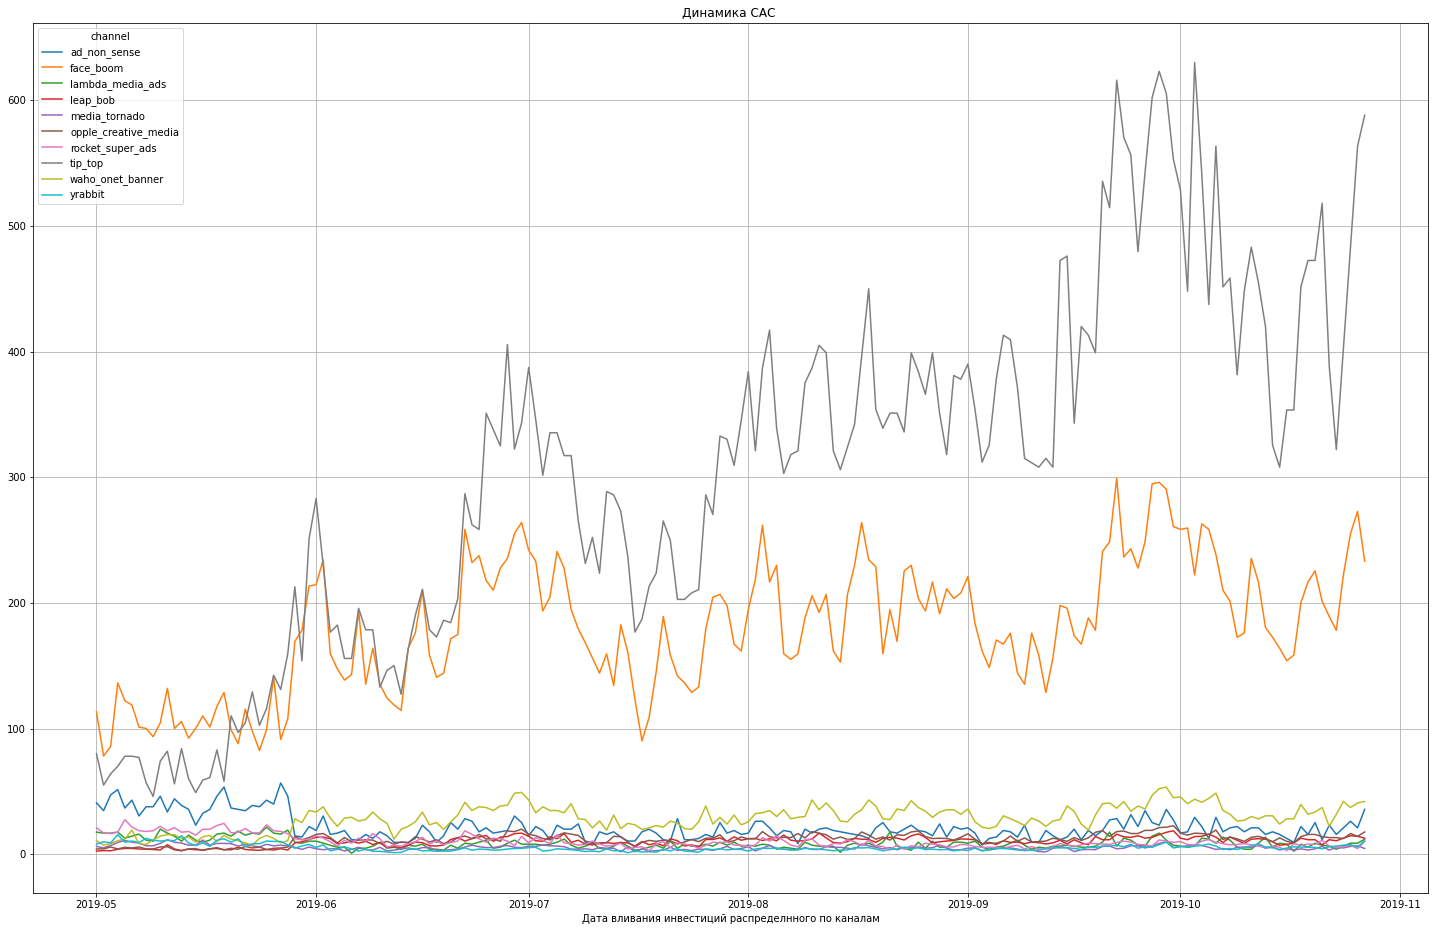

In [61]:
cost_payer_channel = costs.pivot_table(index = 'dt', columns='channel', values = 'costs')
cost_payer_channel.plot(grid=True, figsize=(25,16))
plt.xlabel('Количество вливаний')
plt.xlabel('Дата вливания инвестиций распределнного по каналам')
plt.title('Динамика САС ')
plt.show()

#### Платящие пользователи

,acquisition_cost
dt,
2019-05-01,0.781590
2019-05-02,0.714690
2019-05-03,0.760318
2019-05-04,0.737418
2019-05-05,0.730377
...,...
2019-10-23,1.195554
2019-10-24,1.231369
2019-10-25,1.259270


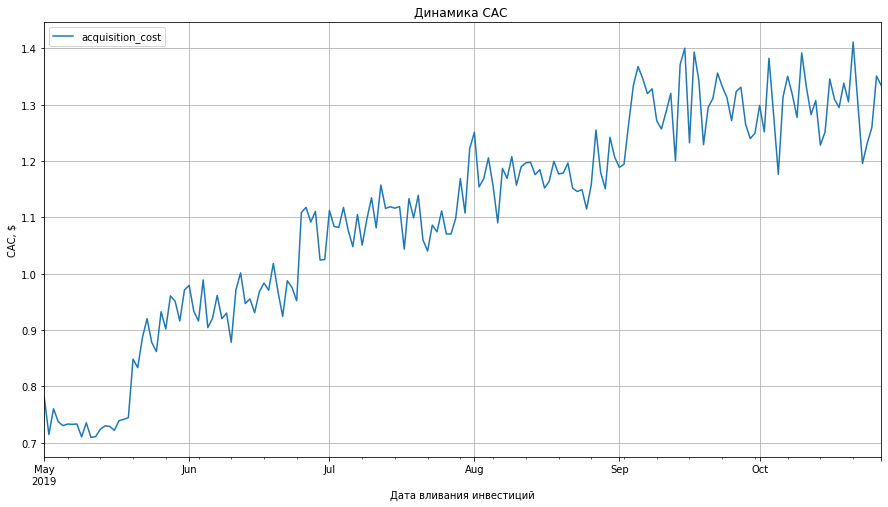

In [62]:
payer_alles1 = profiles1.pivot_table(
    index='dt',  values='acquisition_cost', aggfunc='mean'
)
display(payer_alles1)
payer_alles1.plot(grid=True, figsize=(15, 8))
plt.ylabel('CAC, $')
plt.xlabel('Дата вливания инвестиций')
plt.title('Динамика САС ')
plt.show()

Для платящих пользователей - траты на рекамус мая 19 года шли скачками, то резкий взлет то падение и есть постепенное величение в затраты с 0,8 до 1,4-1,6 у.е

на каждый источник

Все пользователи

channel,ad_non_sense,face_boom,lambda_media_ads,leap_bob,media_tornado,opple_creative_media,rocket_super_ads,tip_top,waho_onet_banner,yrabbit
dt,,,,,,,,,,
2019-05-01,1.050000,1.089423,0.765217,0.210000,0.240000,0.236111,0.540000,0.975610,0.568421,0.289286
2019-05-02,0.962500,1.084722,0.730435,0.183750,0.229091,0.265625,0.565500,1.000000,0.514286,0.253846
2019-05-03,1.050000,1.128947,0.730435,0.210000,0.232000,0.239583,0.528387,1.049180,0.600000,0.310345
2019-05-04,1.008824,1.108943,0.733333,0.199500,0.212727,0.250000,0.531818,0.972222,0.540000,0.294340
2019-05-05,1.020833,1.080531,0.752941,0.200870,0.230000,0.250000,0.561122,1.012987,0.600000,0.290909
2019-05-06,1.025000,1.110280,0.720000,0.192500,0.240000,0.238095,0.527927,1.012987,0.600000,0.269231
2019-05-07,1.050000,1.088172,0.761905,0.190909,0.222000,0.239583,0.603871,1.069444,0.525000,0.273529
2019-05-08,1.080000,1.088043,0.800000,0.199500,0.240000,0.250000,0.549545,0.982759,0.557143,0.293023
2019-05-09,1.021622,1.183544,0.693333,0.210000,0.181622,0.236111,0.520000,0.978723,0.600000,0.300000


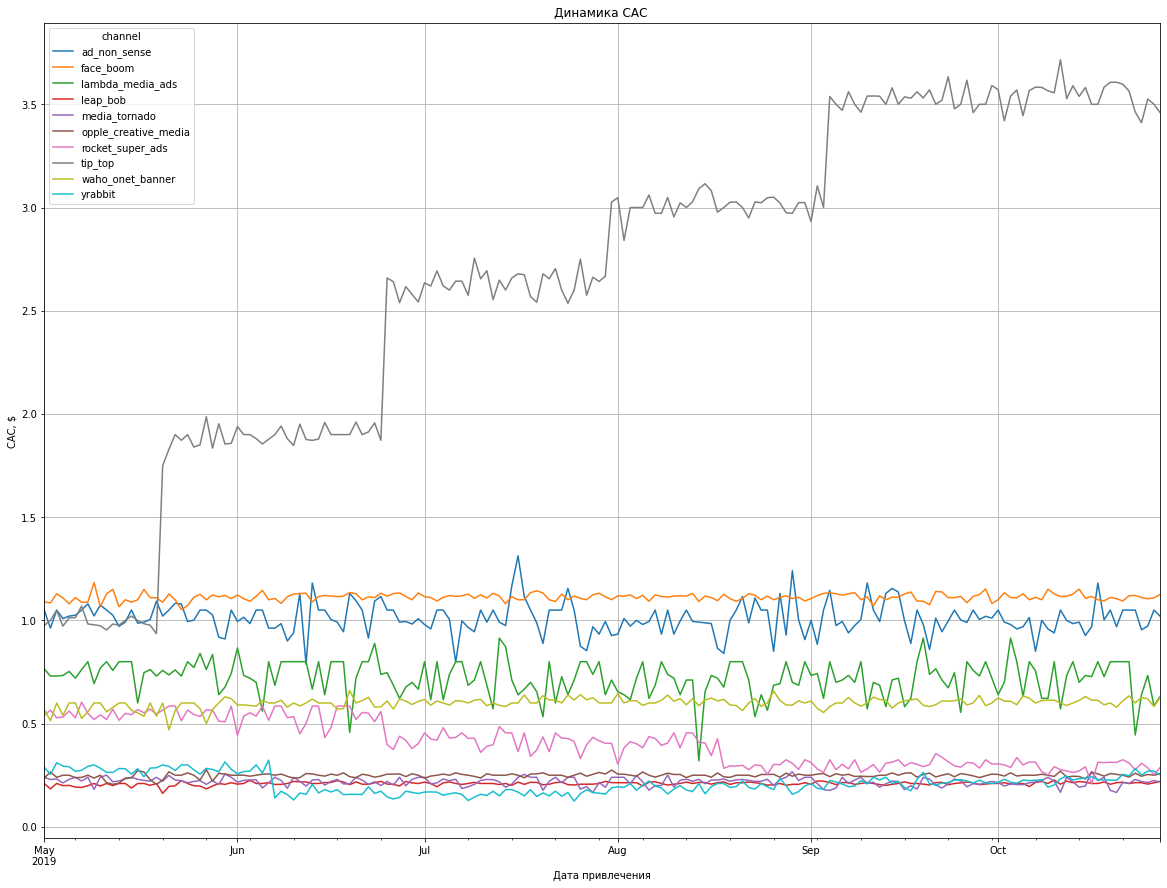

In [63]:
alles_channel = profiles.pivot_table(
    index='dt', columns = 'channel', values='acquisition_cost', aggfunc='mean'
)
display(alles_channel.head(10))
alles_channel.plot(grid=True, figsize=(20, 15))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС ')
plt.show()

По каналам привлечения - почти все каналы не изменяют себе и траты остаются примерно одни и теже что и показывает грпфик в ярде случае некоторых каналов lam,da_media  и ad_nn_sence есть всплески в затратх но если посмотреть по медианному значению то затраты примерно одинаковы за исключением tip_top с после 1й половины мая виден резкий рост инвестиций  следдо затишье и снова всплеск примерно раз в месяц ближе  концу месяца.

Платящие пользователи

channel,ad_non_sense,face_boom,lambda_media_ads,leap_bob,media_tornado,opple_creative_media,rocket_super_ads,tip_top,waho_onet_banner,yrabbit
dt,,,,,,,,,,
2019-05-01,1.050000,1.089423,0.765217,0.21000,0.240000,0.236111,0.540000,0.975610,0.568421,0.289286
2019-05-02,0.962500,1.084722,0.730435,0.18375,0.229091,0.265625,0.565500,1.000000,0.514286,0.253846
2019-05-03,1.050000,1.128947,0.730435,0.21000,0.232000,0.239583,0.528387,1.049180,0.600000,0.310345
2019-05-04,1.008824,1.108943,0.733333,0.19950,0.212727,0.250000,0.531818,0.972222,0.540000,0.294340
2019-05-05,1.020833,1.080531,0.752941,0.20087,0.230000,0.250000,0.561122,1.012987,0.600000,0.290909


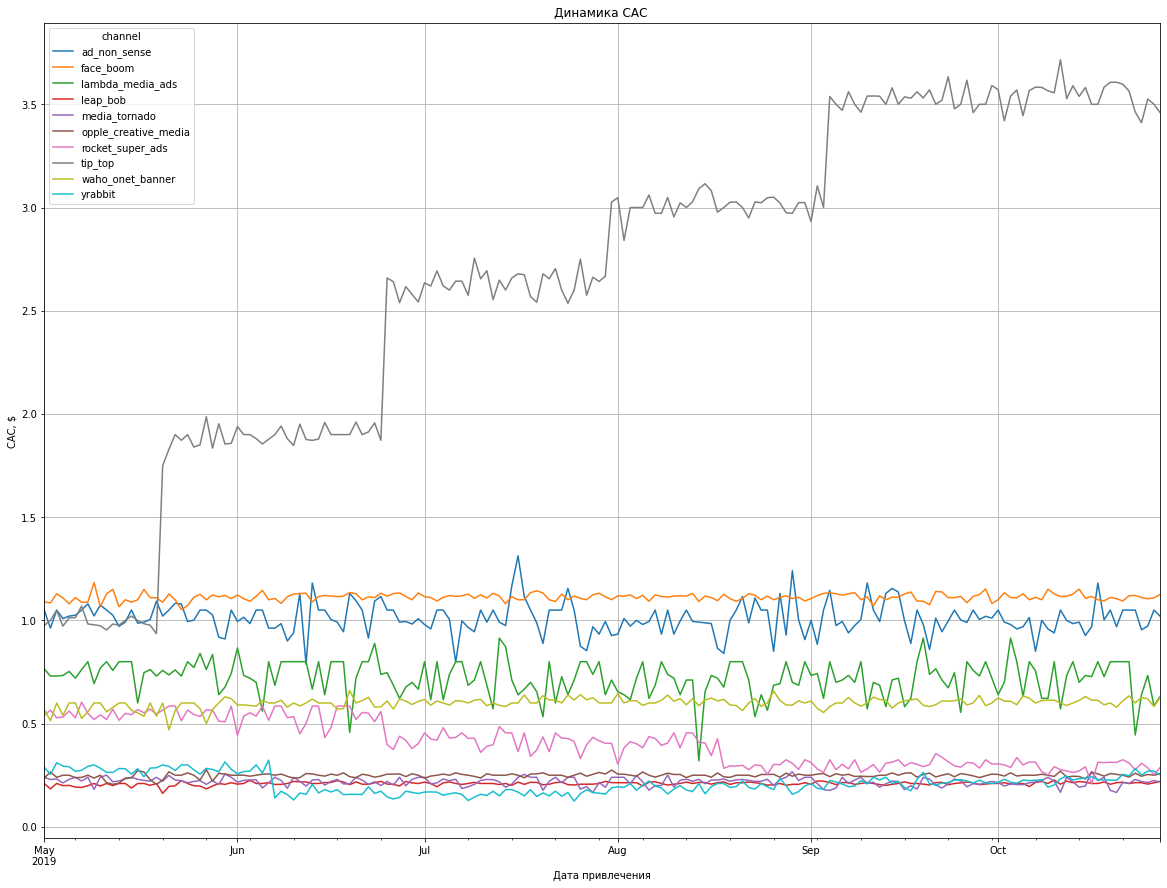

In [64]:

channel_payer = profiles1.pivot_table(
    index='dt', columns = 'channel', values='acquisition_cost', aggfunc='mean'
)
display(channel_payer.head(5))
channel_payer.plot(grid=True, figsize=(20, 15))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС ')
plt.show()

По платящим пользователям такая же картина что и по всем.

Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [65]:

pr = pd.pivot_table(profiles, index = 'channel', values = 'acquisition_cost', aggfunc = 'mean')
pr = pr.query('channel != "organic"')
pf = pd.pivot_table(profiles, index = 'channel', values = 'user_id', aggfunc = 'count')
pr = pr.merge(pf, on = 'channel')
pr['mean']= pr['acquisition_cost']/pr['user_id']
pr

,acquisition_cost,user_id,mean
channel,,,
ad_non_sense,1.008054,3880,0.000260
face_boom,1.113286,29144,0.000038
lambda_media_ads,0.724802,2149,0.000337
leap_bob,0.210172,8553,0.000025
media_tornado,0.218717,4364,0.000050
opple_creative_media,0.250000,8605,0.000029
rocket_super_ads,0.412095,4448,0.000093
tip_top,2.799003,19561,0.000143
waho_onet_banner,0.602245,8553,0.000070


По выше построенной таблице видна стоимость привлечения одного пользователя  в разбивке по каналам, и подозрительно выглядит organic при самом боьшом количестве юзеров траты равны 0, что при дальнем вычислении даст ошибку, при дальнейшем анализе данный канал исключу, что касается по стоимости привлечения то самые высокие затраты на одного пользвателя у lambda_media_ads с 0.000337 уе, ad_non_sense - 0.000260 и  тд.

In [67]:

pr_1_mean = pr['acquisition_cost'].sum()/pr['user_id'].count()
display(f'Средний CAC на одного пользователя состовляет - {pr_1_mean} у.е.')

'Средний CAC на одного пользователя состовляет - 0.7557348976115401 у.е.'

In [83]:
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,face_boom,mac,united_states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,face_boom,iphone,united_states,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,ad_non_sense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united_states,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,ad_non_sense,android,france,2019-06-30,2019-06-01,True,1.008000


In [69]:

mittel_sas=profiles['acquisition_cost'].mean()
display(f'Средний CAC на одного пользователя состовляет - {mittel_sas} у.е.')

'Средний CAC на одного пользователя состовляет - 1.1274813239427588 у.е.'

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

Исключаем канал Органик из дальнейшего анализа.

In [70]:
profiles = profiles.query('channel!= "organic"')
profiles1 = profiles.query('channel!= "organic"')

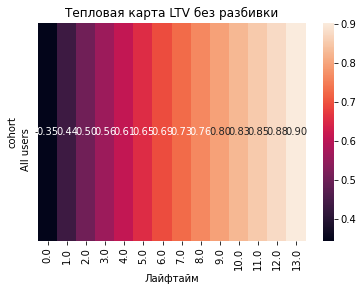

In [71]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

sns.heatmap(ltv_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2f' )
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()


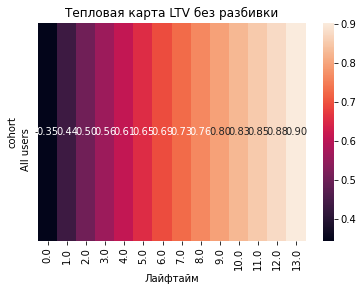

In [72]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days
)

sns.heatmap(ltv_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2f' )
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

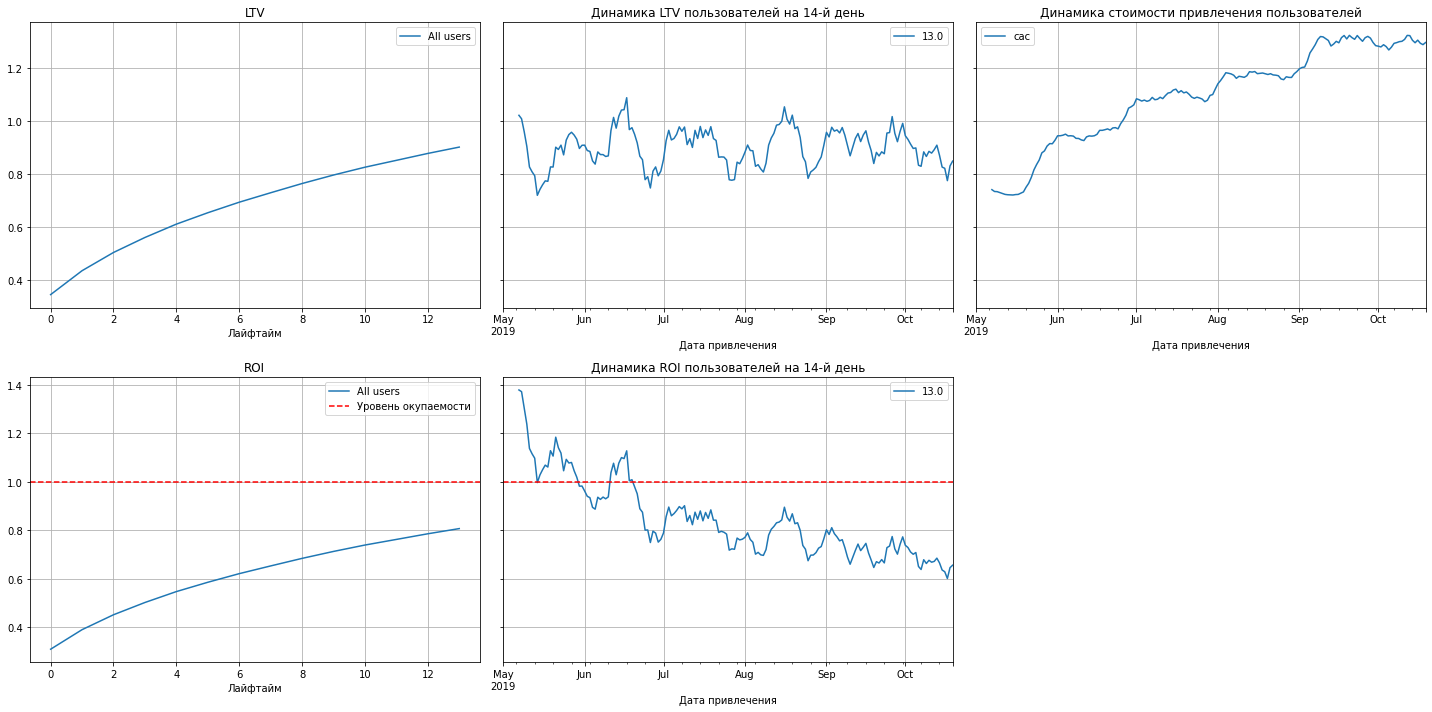

In [73]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

При расмотрении графиков за весь переиод видно что LTV растет но за выдранныйй горизонт анализа в 14 дней траты не окупились на 13 день возврат по инвестициям соствляет 0,8 уе при САС равным 1.0, Динамика LTV остается приерно на оном уровне при скачках с 0,8 до 1.0 уе., а вот динамика стоимости постенно растет, ROi за 14 дней показывает постенный спад возврата инвестиций видно пользователи постепенно уходят но это общий анализ по всем каналам странам и устройствам и почему идет спад посмотрим далее поустроцствам.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

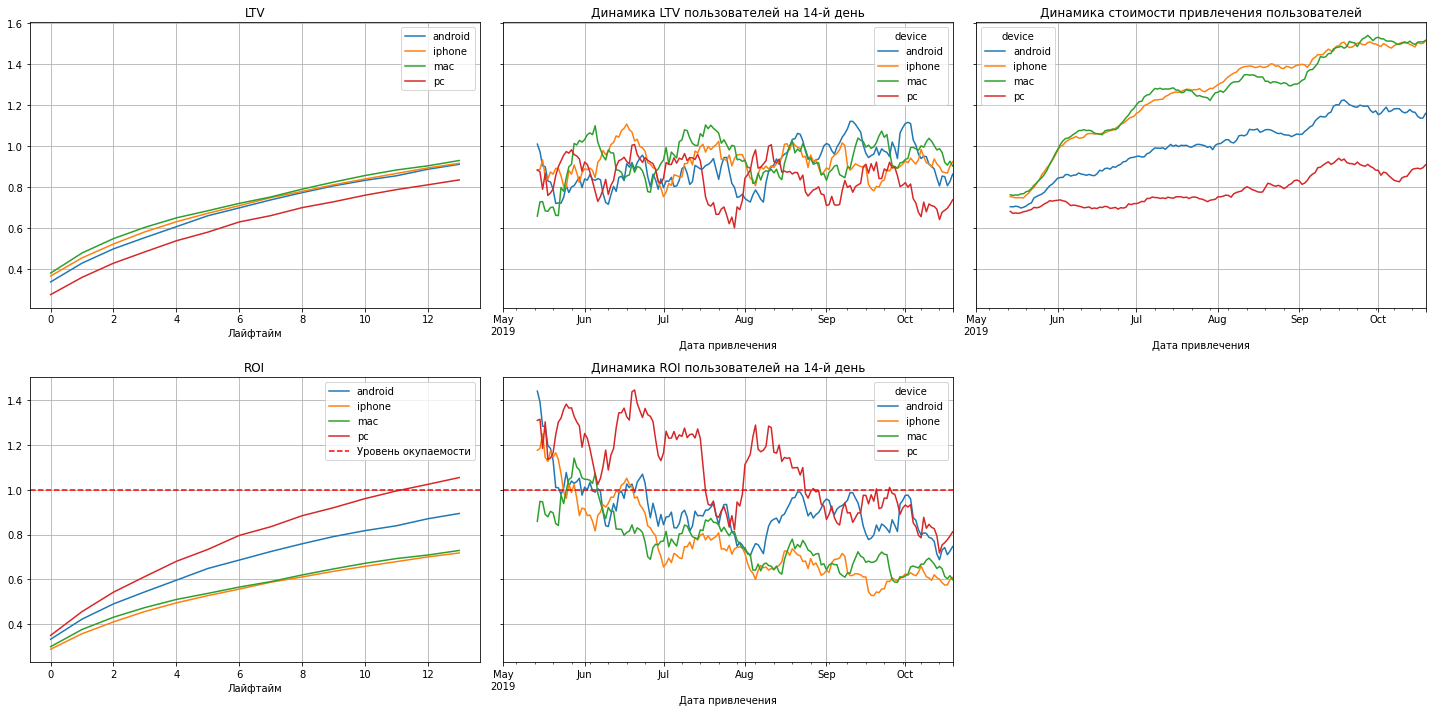

In [74]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Анализ по устройствам показывает что LTV по Ipone, android, mac и pc растет но окупаемость вложенных средств показывает на 14 день только pc, рядом следует android почтина границе окупаемости и на уровне 0.7 уе находятся Ipone и mac, наверно в этом и есть проблема при расмтрение динамики стоимости привлечения клиентов для pc и android виден незначитеьный рост тогда как для ipone  и mac видно значительное увеличение вложений и не смотря на это ROI всеравно не показывает окупаемость и динамика тож пользователей тоже снижается.

### Проанализируйте окупаемость рекламы с разбивкой по странам

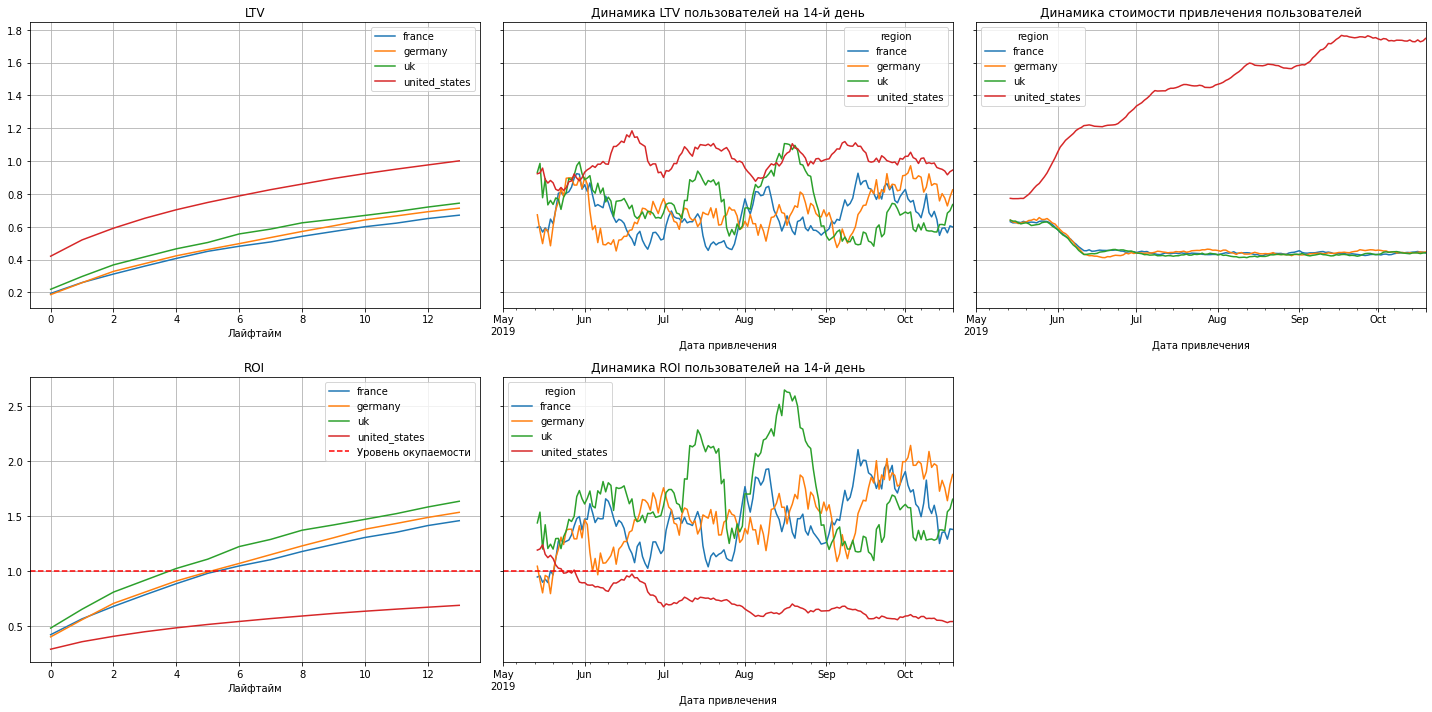

In [75]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Немсотря на высокие показатели привлечения клиентов по Америке видно что окупаемости на 14 день не вышло, у Америке она уровне 0..7 ппри горизонте окупаемости САС в 1 уе, по динамике возврата средств по регионам Америка тоже уходит в минус постенно тогда как Франция Германия и Англия имеет постенный рост с всплеском в середине августа.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

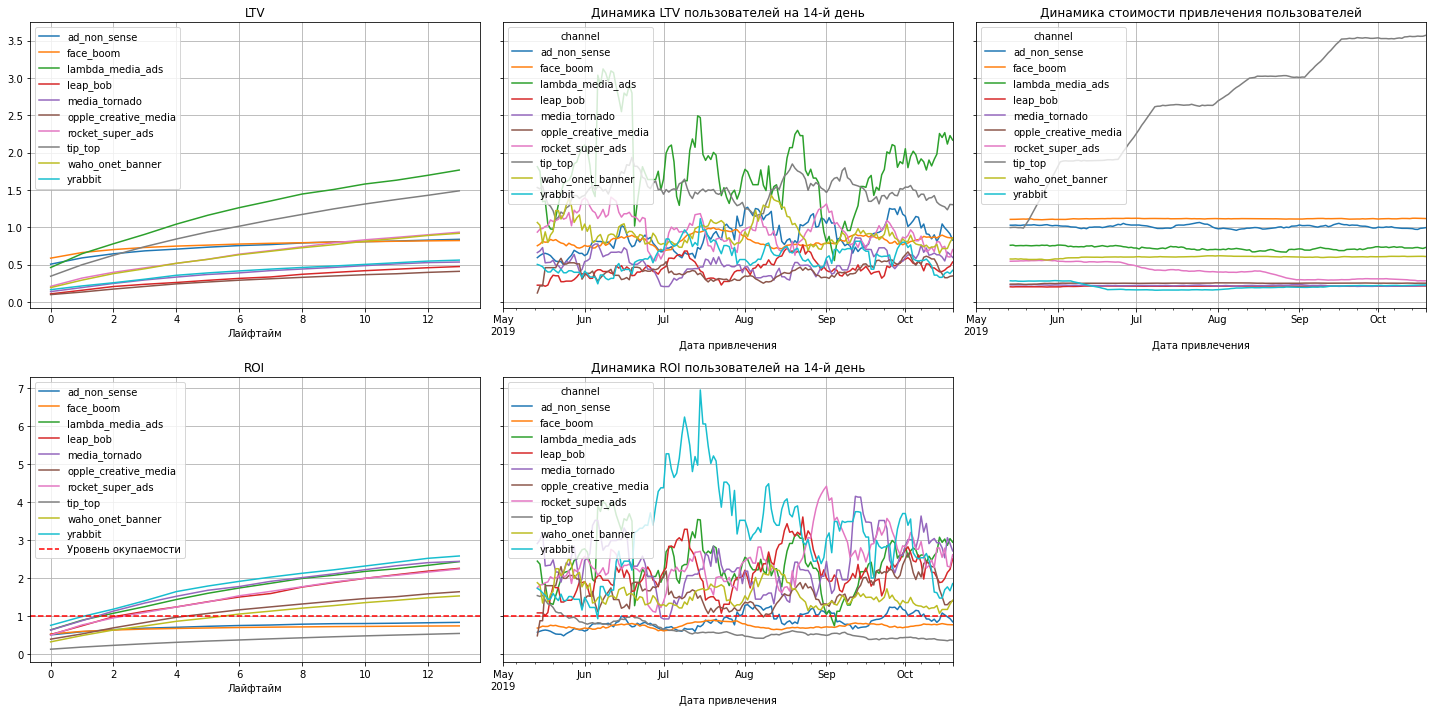

In [76]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Каналы привлечения не показывают ничего определенного, почт все каналы вышли на линию окупаемости график ROI показывает что лишь часть каналов на границе окупаемости на 14 день точнее 3 а все остальные отбили свои вложения, динамика стоимости првлечения клиентов тоже почти у всех одинакова кроме titp_top у них ежемесячно идет увеличение вложений на привлечене клиентов, из неокупившихся видны три канала на уровне 0,7 - 0,8 tip_top,face_boom,lambda_media_ads

Конверсия

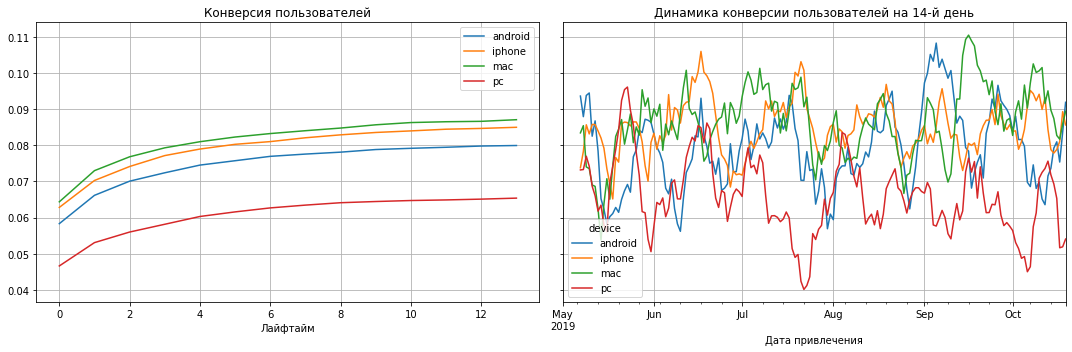

In [77]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По устройствам лучше всех конвертируется mac  и ipone, и рядом с ними находится android на уровне 0,08 и и замыкает pc с показателем в 0.065 на 14 день.

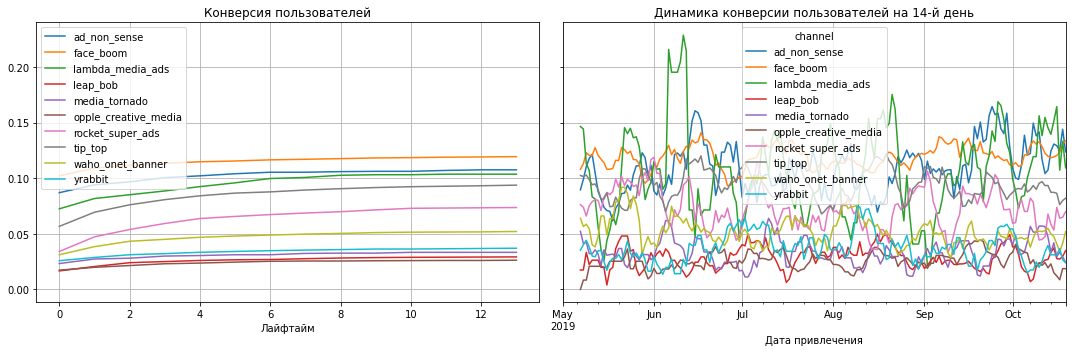

In [78]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Собственно как вложились каналы то и получили, конверсия растет только у канала tiptop что собственно и показывают графики ROI.

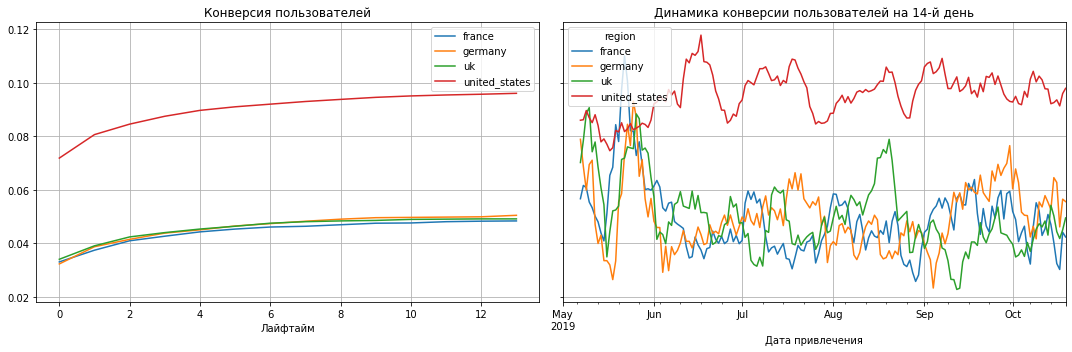

In [79]:
# смотрим конверсию с разбивкой по регионам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По регионам Америка лучше остальных конвертируется и на 14 день выходит на уровень 0,1 тогда как остальные вышли к 0.5

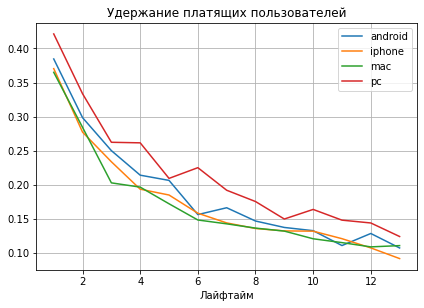

In [80]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

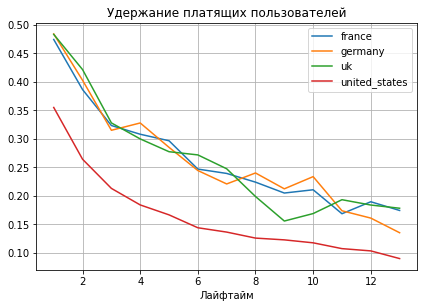

In [81]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По удержанию пользователей лидирует на 14 день Великобритания и Франция а вот Америка хуже удерживает клиентов, Германия чуть лучше Америки

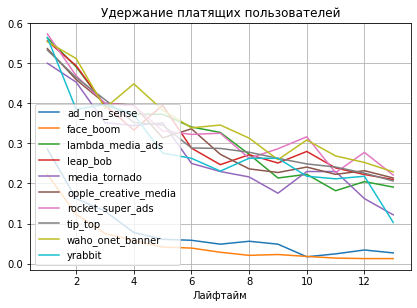

In [82]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По каналам - самые низкие показатели на 14 день по удержанию у face_boom и ad_non_sense, к ним приближается yrabbit и media_tornado, остальные имеют хорошие показатели по удержанию и остальные держатся все вместе на уровне 0,2-0,3

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Вывод 
-   имеющиеся данные из табиц costs, orders и visits подготовил для дальнейшего анализа. Первое что сделал с каждой таблицей это получил общую информацию по таблицах, в столбцах со временем данные имели тип object  - заменил на временной для удобствра дальнейшего использования, поиск дубликатов ничего не показал  повторов нигде нет, как и пропусков, шрифт привел к "змеиному" в названиях столбцов и везде где необходимо.
- 1е место среди всех пользователей занимает Америка с 100002 пользователями, следом идет Великобритания с 17575 пользвателями, дальше Франция и Германия - 17450 и 14981 человек. 
По платящим пользователям картнина такая же - 1е место среди всех пользователей занимает Америка с 6902 пользователями, следом идет Великобритания с 700 пользвателями, дальше Франция и Германия - 663 и 616 человек.
Вывод - из платящих пользователей доляАмерика занимает 77.7% от общего числа пользователей, Великобитания - 7,8% и Франция и Германия 7,47%  и 6,94%. 
- при разбивке пользователей по их устройствам получил что в основном в приложение заходя с Ipone 54479 юзера, для платящих пользователей - 3382 юзера, на Android - 35032 и платящие 2050 пользователя, и с pc и mac  30455 и  30042 для всех пользователей и для платящих  1537  1912 юзера.
если смотреть в процентном соотношении  то iphone состовляет 38%, android - 23%, mac - 21% и pc - 17%.
- по каналам привлечения пользователей картина следующая, начнем с общего количества пользователей - organic - 56439,face_boom - 29144 ,tip_top -19561,opple_creative_media-8605 и waho_onet_banner-8553 пользователя/ для платящих клиентов картина немного иная - face_boom-3557,tip_top-1878,organic-1160,waho_onet_banner-453,ad_non_sense-440/ 
По процентному соотношению лидирует face_boom - 40%, tip_top - 21% organic - 13%.
По графику видно что с мая 2019 года до ноября затраты на маркетинг примерно симетрично растут с небольшими скачками, с небольшой задержкой в мае после середины месяца траты на рекламу стали расти.
Для платящих пользователей - траты на рекамус мая 19 года шли скачками, то резкий взлет то падение и есть постепенное величение в затраты с 0,8 до 1,4-1,6 у.е
По каналам привлечения - почти все каналы не изменяют себе и траты остаются примерно одни и теже что и показывает грпфик в ярде случае некоторых каналов lam,da_media  и ad_nn_sence есть всплески в затратх но если посмотреть по медианному значению то затраты примерно одинаковы за исключением tip_top с после 1й половины мая виден резкий рост инвестиций  следдо затишье и снова всплеск примерно раз в месяц ближе  концу месяца
По платящим пользователям такая же картина что и по всем.
По выше построенной таблице видна стоимость привлечения одного пользователя  в разбивке по каналам, и подозрительно выглядит organic при самом боьшом количестве юзеров траты равны 0, что при дальнем вычислении даст ошибку, при дальнейшем анализе данный канал исключу, что касается по стоимости привлечения то самые высокие затраты на одного пользвателя у lambda_media_ads с 0.000337 уе, ad_non_sense - 0.000260 и  тд.
При расмотрении графиков за весь переиод видно что LTV растет но за выдранныйй горизонт анализа в 14 дней траты не окупились на 13 день возврат по инвестициям соствляет 0,8 уе при САС равным 1.0, Динамика LTV остается приерно на оном уровне при скачках с 0,8 до 1.0 уе., а вот динамика стоимости постенно растет, ROi за 14 дней показывает постенный спад возврата инвестиций видно пользователи постепенно уходят но это общий анализ по всем каналам странам и устройствам и почему идет спад посмотрим далее поустроцствам.
Анализ по устройствам показывает что LTV по Ipone, android, mac и pc растет но окупаемость вложенных средств показывает на 14 день только pc, рядом следует android почтина границе окупаемости и на уровне 0.7 уе находятся Ipone и mac, наверно в этом и есть проблема при расмтрение динамики стоимости привлечения клиентов для pc и android виден незначитеьный рост тогда как для ipone  и mac видно значительное увеличение вложений и не смотря на это ROI всеравно не показывает окупаемость и динамика тож пользователей тоже снижается.
Немсотря на высокие показатели привлечения клиентов по Америке видно что окупаемости на 14 день не вышло, у Америке она уровне 0..7 ппри горизонте окупаемости САС в 1 уе, по динамике возврата средств по регионам Америка тоже уходит в минус постенно тогда как Франция Германия и Англия имеет постенный рост с всплеском в середине августа.
Каналы привлечения не показывают ничего определенного, почт все каналы вышли на линию окупаемости график ROI показывает что лишь часть каналов на границе окупаемости на 14 день точнее 3 а все остальные отбили свои вложения, динамика стоимости првлечения клиентов тоже почти у всех одинакова кроме titp_top у них ежемесячно идет увеличение вложений на привлечене клиентов.
По устройствам лучше всех конвертируется mac  и ipone, и рядом с ними находится android на уровне 0,08 и и замыкает pc с показателем в 0.065 на 14 день.
По регионам Америка лучше остальных конвертируется и на 14 день выходит на уровень 0,1 тогда как остальные вышли к 0.5

Удержание в Америке остает от остальных регионов и показывает самые низшие показатели,по устройствам только ipone показывает самый низкий уровень удержания.

Из всего выше перечисленного можно сделать вывод что проблема состоит в устройствах ipone и mac у них возврат пос редствам самый низкий тогда как траты на привлечение новых клинтов только растут, и проблема в Америке хотя там LTV и растет но окупаемость не за 14 дней не настала, тогда как удержание по Америке достаточно высокая возможно проблема в версии ipone и мас устройств в Америке или изза большой разнице в общем количестве всех расматриваемых пользователей и платящих пользователей.

Рекомендации - 
 - Стоит обратить внимание на Америку хотя конверсия пользователей в этом регионе высокая но удержане клиентов и окупаемость по рекламе самая низкая среди других регионов и равна ROI  = 0.6-.7  при растущем показатели привлечения клиентов
 - по устройствам проблема видна на ipone и mac  окупеамость екламы за 14 дней не вышла на линию окупаемсти хотя конверсия от этих устройств, возможно эти поблемы(региона и устройств) связаны и зависят от прошивки апаратов в этом еще стоит разобраться
 - по каналам стоит обратить внимание на tip_top,face_boom,lambda_media_ads , они так и не вышли на окупаемость, ROI = 0.7, хотя конверсия у этих каналов самая высокая
 - на канале face_boom на графике САС видно с течением времени траты на рекламу вооще не растут и остаються на одном уровнеб это возможно одна из причин не эфективности этого канала, lambda_media_ads таже беда только со знаком минус в плане траты постепенно уменьшатся но скачком возвращают на этот же уровень, а вот с каналом tip_top все запутано хотя конверсия одна из самых высоких ROI самы низкий
 Из всего выше перечисленного выходит что глаавные проблемы состоят в устройствах mac, ipone возможно все проблемы в Америке но не уверен, и  tip_top,face_boom,lambda_media_ads каналы не выдают небходимых результатов что и дает проблемы с маркетингом.
 - из прибыльных каналов стоит выделить yrabbit, leap_bob, rocket_super_ads, media_tornado они уже на 4 день перешли линию окупаемости, но инвестиции постепенно снижаются у этих каналов видно от этого и страдает конверсия, если увеличить вливание в эти каналы и результат станет лучше.